In [1]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
side = 30
plotside = side if side < 10 else 10
#
theLattice = Lattice2D(#
    side1 = side,
    side2 = int(side * np.sqrt(3)),
    geometry = 'triangular',
)
plotlattice = Lattice2D(#
    side1 = plotside,
    side2 = int(plotside * np.sqrt(3)),
    geometry = 'triangular',
    pbc = False
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
)

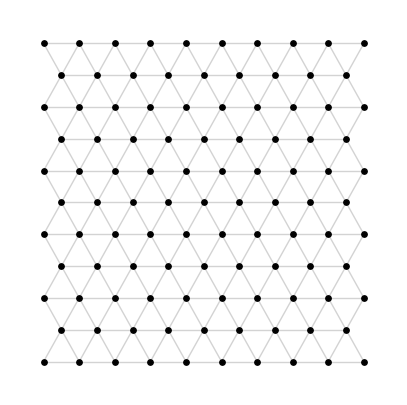

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(plotlattice.H, 
        pos=plotlattice.posH, 
        ax=ax,  
        edge_color='lightgray', 
        node_color='k',  
        node_size=15,
        with_labels=False)
plt.show()

In [4]:
SLRG_obj.laplacian_dynamics_init()
SLRG_obj.upd_graph_matrices()

In [5]:
SLRG_obj.run_laplacian_dynamics()

0 -1.0141422420039454 0.9969920782270271
10 -1.0141422420031332 0.02062515640636977
20 -1.0141422420023365 0.0076881849158505185
30 -1.0141422420015445 0.004061076799302379
40 -1.0141422420007546 0.0025056589919425203
50 -1.0141422419999668 0.001705550188716477
60 -1.0141422419991801 0.0012421161747969381
70 -1.0141422419983945 0.0009467926393415241
80 -1.0141422419976094 0.0007435388001852611
90 -1.0141422419968238 0.000595283235486531
100 -1.014142241996038 0.0004826041561913238
110 -1.014142241995252 0.0003945364047168102
120 -1.0141422419944661 0.0003244021652281539
130 -1.014142241993681 0.00026783745951770247
140 -1.014142241992896 0.00022181487699986284
150 -1.0141422419921116 0.00018413383987374386
160 -1.0141422419913275 0.00015313853820910463
170 -1.014142241990544 0.000127551657491961
180 -1.014142241989761 0.00010637007606756639
190 -1.0141422419889787 8.879566489929067e-05
200 -1.0141422419881974 7.418717377777379e-05
210 -1.0141422419874164 6.20255140595431e-05
220 -1.014

In [41]:
# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []

In [42]:
G = nx.triangular_lattice_graph(L, L, periodic=False, with_positions=True)
nN = G.nodes().__len__()
neg_weightsH = {(nN//2, nN//2+1): -1}
# neg_weightsH = {(663, 690): -1}
fraction_to_flip = 0.07
#
nx.set_edge_attributes(G, values=1, name='weight')
# flip_random_fract_edges(G, fraction_to_flip)
H = nx.convert_node_labels_to_integers(G)
nx.set_edge_attributes(H, values=neg_weightsH, name='weight')
# nx.set_edge_attributes(H, values=neg_weightsH, name='weight')
#
# neighbor_dictG = nx.single_source_shortest_path_length(G, (0, 0))
# neighbor_dictH = nx.single_source_shortest_path_leeigenModeInitngth(H, 0)
# #
# Gedges = lis# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []t(G.edges(data=True))
# neg_weightsG = [i for i in Gedges if i[2]['weight'] == -1]
# Hedges = list(H.edges(data=True))
# neg_weightsH = [i for i in Hedges if i[2]['weight'] == -1]
# #
# print('Flipped edges:', '\nG graph', neg_weightsG, '\nH graph', neg_weightsH, '[+ G negative edges]')

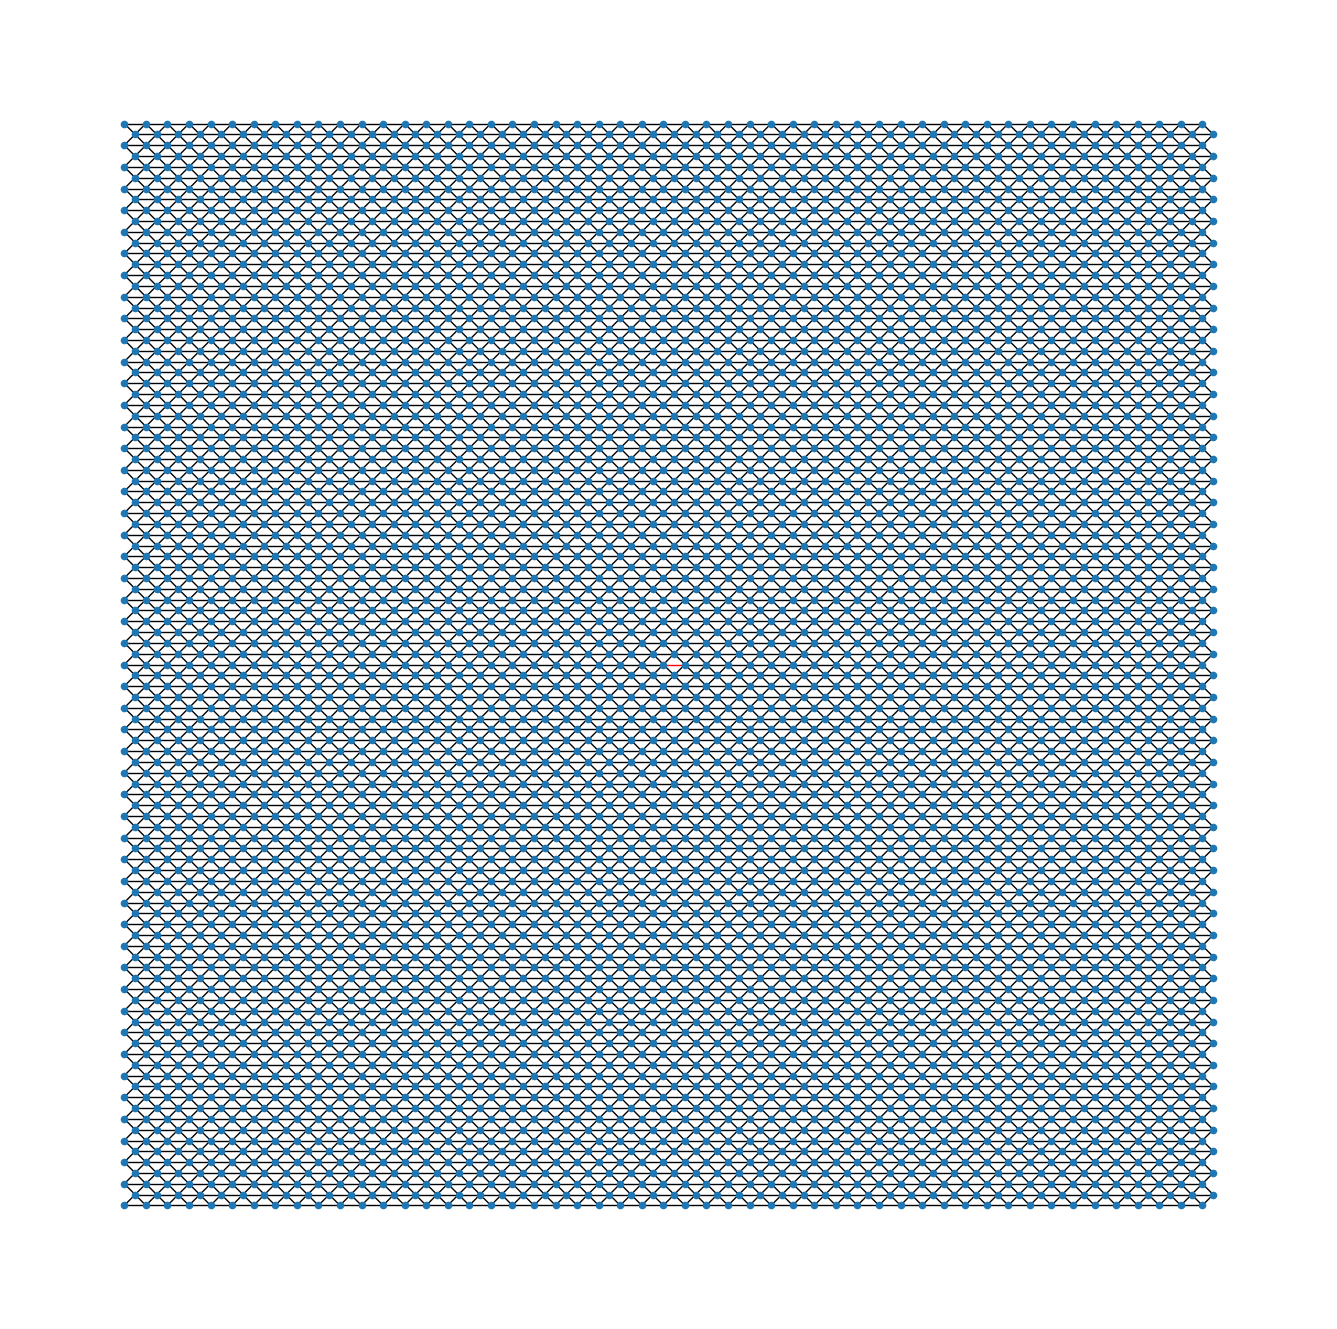

In [43]:
# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []
fig, ax = plt.subplots(figsize=(17, 17))
pos = nx.get_node_attributes(H, 'pos')
# Pass the positions while drawing
Hedges = list(H.edges(data=True))
Gedges = list(G.edges(data=True))

edge_colorH = ['red' if d['weight'] == -1 else 'black' for u,v,d in Hedges]
nx.draw(H, pos=pos, ax=ax,  with_labels=False, node_size=20, edge_color = edge_colorH)

In [44]:
adj = nx.adjacency_matrix(H).toarray()
dia = np.diag(adj.sum(axis=1))
lapl = dia - adj
diabs = np.diag(np.abs(adj).sum(axis=1))
slapl = diabs - adj
eigv, eigV = np.linalg.eigh(slapl)

In [45]:
if initial_cond == 'uniform_1':
    status_array = np.random.uniform(-1, 1, nN)#np.ones(L**2)
elif initial_cond == 'delta_1':
    status_array = np.zeros(L**2)
    status_array[L**2//2] = L**2
elif initial_c# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []ond == 'gauss_1':
    status_array = np.random.normal(0, 1, nN)
elif initial_cond.startswith('ground_state'):
    eigenMode = int(initial_cond.split('_')[-1])
#
if BC_choice == 'FBC':
    # fixed_border_idxs = np.array(list(set(
    #                   np.concatenate([[i for i in range(L)], 
    #                         [i for i in range(L**2) if i % L ==0], 
    #         # parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []                [i for i in range(L**2) if (i+1) % (L) ==0],
    #                         [i for i in range(L**2-L, L**2)]]))))
    fixed_border_idxs = np.array(sorted([i for i in range(L)] + \
                [(L-1) * L + i for i in range(L)] + \
                [i * L for i in range(1, L-1)] + 
                [(i+1) * L - 1 for i in range(1, L-1)]))
    status_array[fixed_border_idxs] = fbc_val

In [46]:
# status_array = status_array/status_array.sum()
for t in range(250):
    status_array_old = status_array
    if (t % sampling == 0):
        print(t, np.mean(status_array), np.var(status_array))
    status_array = status_array - Deltat*((slapl - eigv[0])@status_array) #+ np.sqrt(Deltat)*np.random.uniform(-1e-3, 1e-3, L**2)
    if BC_choice == 'FBC':
        status_array[fixed_border_idxs] = fbc_val
    # if (np.abs(status_array_old - status_array) < 1e-7*np.ones(L**2)).all():
    #     print('Convergence rea\ched')
    #     break

0 0.0015187647921819673 1.0153183153100178
10 0.006992765984290878 0.027342478681553213
20 0.03168181556595612 0.015020604224379518
30 0.143782092215216 0.01071239328320735
40 0.6525993983030811 0.008442293431563701
50 2.9620182220590783 0.007351569053939111
60 13.443967354305494 0.013423083947990976
70 61.01923156232755 0.1565504947312242
80 276.952890150635 3.10928086617492
90 1257.0282558443816 63.89662496229732
100 5705.374693617355 1315.9103781373512
110 25895.44039495315 27106.90452895904
120 117533.70614402127 558409.5650300252
130 533459.6309859625 11503498.103726648
140 2421255.886637379 236977941.19231528
150 10989547.714576298 4881869019.112943
160 49879139.01922216 100569054968.00154
170 226390436.9783851 2071775176387.8992
180 1027536380.1990951 42679653342262.55
190 4663761538.361455 879223205379859.2
200 21167787443.67677 1.811245838535336e+16
210 96075929606.40628 3.731261263020041e+17
220 436067504659.8936 7.686593568286409e+18
230 1979214454643.4424 1.5834785215856135

/tmp/ipykernel_53010/778328184.py:18: RuntimeWarning: divide by zero encountered in log
  field = np.log(np.max(status_array)-status_array)


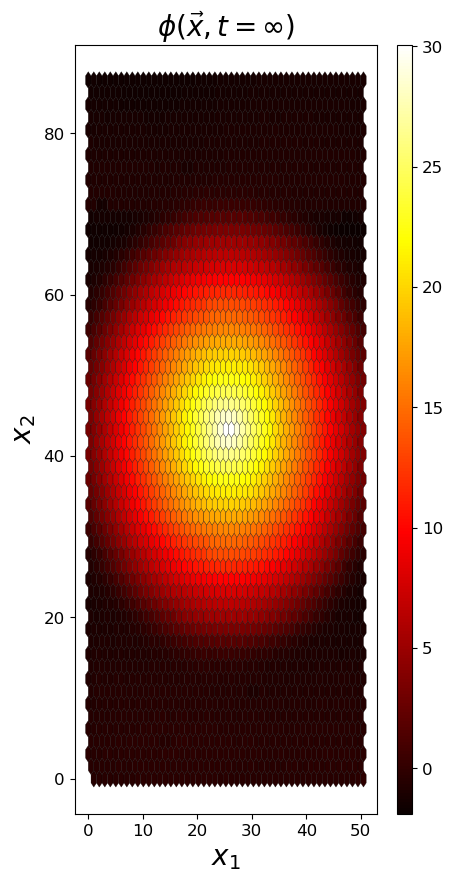

In [49]:
from scipy.interpolate import griddata
plt.rc('font', size=12)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
cax_dict = {"size": "5%", "pad":0.2}
axvline_cr = {"ls": ":", "color": "red"}
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
x, y = np.array([i[1] for i in list(pos.items())]).T
fig, ax1 = plt.subplots(figsize=(6, 6*np.max(y)/np.max(x)))
#

ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_title(r"$\phi(\vec{x}, t=\infty)$")
#
# phi_plot = status_array
status_array = np.abs(status_array)
field = np.log(np.max(status_array)-status_array)
# phi_plot = np.log10(np.max(status)-status)
# phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
# phi_plot = n# parameters
initial_cond = 'gauss_1'
BC_choice = 'PBC'
#
L = 100
t_steps = 10
no_obs = 5
fbc_val = 1
#
Deltat = 1/t_steps
simulationTime = L**2*t_steps
sampling = 1*t_steps
frames = simulationTime // sampling
#
frames_dynsys = []p.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))
im1 = ax1.hexbin(x, y, C=field, cmap=plt.cm.hot, gridsize=50, edgecolor = "k", lw=.2)
#
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", **cax_dict)
clb = fig.colorbar(im1, cax=cax)
#
# circ = Circle((L//2,L//2),critrad, alpha=0.5, lw=2)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),25, ls='--', lw=1, color='k', fill=False)
# ax1.add_patch(circ)
# circ = Circle((L//2,L//2),1.0187186, alpha=0.5, lw=2, color='red')
# ax1.add_patch(circ)

fig.tight_layout(pad=5.0)
fig.savefig(r"ball.pdf", bbox_inches='tight', transparent=True
            )

In [50]:
starr = field[nN//2:nN//2+26]

-1.0645685120657409

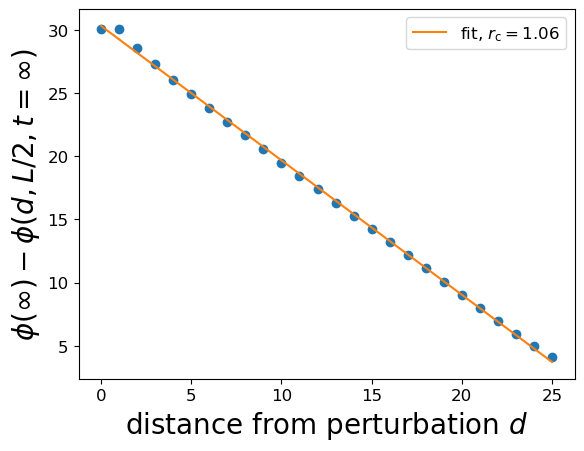

In [52]:
plt.plot(starr, 'o')
x = np.array(list(range(0, len(starr))))
params, cov = curve_fit(line, x, starr)
plt.plot(x, line(x, *params), label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')

params[0]

-1.8427517581899315

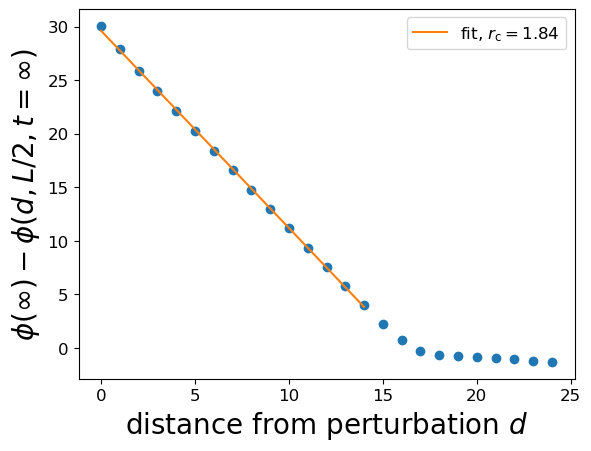

In [60]:
column_index = 25  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = np.array([node_id for node_id, pos in nx.get_node_attributes(H, 'pos').items() if pos[0] == column_index])
plt.plot(field[column_indices][25:50], 'o')
x = np.array(list(range(0, len(field[column_indices][25:40]))))

params, cov = curve_fit(line, x, field[column_indices][25:40])

plt.plot(x, line(x, *params),  label=rf"fit, $r_{{\rm c}} = {np.abs(params[0]):.2f}$")
plt.xlabel(r"distance from perturbation $d$")
plt.legend()
plt.ylabel(r"$\phi(\infty) - \phi(d, L/2, t=\infty)$", color='black')
params[0]

In [459]:
plt.plot(field[column_indices])


IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
status_array

array([-1.62122488e+25, -1.62093189e+25, -1.62045759e+25, -1.61991660e+25,
       -1.61957730e+25, -1.61961113e+25, -1.62067771e+25, -1.61988154e+25,
       -1.61856923e+25, -1.61733889e+25, -1.61697143e+25, -1.61788810e+25,
       -1.62029675e+25, -1.61900747e+25, -1.61584468e+25, -1.61128331e+25,
       -1.60831126e+25, -1.60888788e+25, -1.61831947e+25, -1.61329774e+25,
       -1.60033164e+25, -1.58455449e+25, -1.58153198e+25, -1.59170783e+25,
       -1.61829114e+25, -1.61346105e+25, -1.59451194e+25, -1.53561241e+25,
       -1.48860094e+25, -1.51881298e+25, -1.61578729e+25, -1.60260840e+25,
       -1.54204948e+25, -1.21411062e+25, -1.20386258e+25, -1.50182318e+25,
       -1.61829114e+25, -1.61346105e+25, -1.59451194e+25, -1.53561241e+25,
       -1.48860094e+25, -1.51881298e+25, -1.61831947e+25, -1.61329774e+25,
       -1.60033164e+25, -1.58455449e+25, -1.58153198e+25, -1.59170783e+25,
       -1.62029675e+25, -1.61900747e+25, -1.61584468e+25, -1.61128331e+25,
       -1.60831126e+25, -

In [ ]:
triangular_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the dimensions of the triangular grid
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid

# Calculate the index of the vertical line at half of the horizontal length
line_index = m // 2

# Calculate the index range of the elements passing through the vertical line
start_index = line_index * (n - 1)
end_index = (line_index + 1) * (n - 1) + 1

# Extract the elements passing through the vertical line
line_elements = triangular_array[start_index:end_index]


In [ ]:
line_elements
plt.hexbin(x, y, C=triangular_array, cmap=plt.cm.hot, gridsize=50)

array([5, 6, 7])

In [ ]:
# Assuming you have a 1D array representing the elements on a triangular lattice
triangular_array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Define the dimensions of the triangular grid
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid

# Calculate the index of the vertical line at half of the horizontal length
line_index = m // 2

# Calculate the number of elements in the rows above the vertical line
elements_above_line = (n - 1) * line_index

# Calculate the number of elements in the rows below the vertical line
elements_below_line = (n - 1) * (m - line_index)

# Calculate the start index of the elements passing through the vertical line
start_index = elements_above_line + elements_below_line

# Calculate the end index of the elements passing through the vertical line
end_index = start_index + n

# Extract the elements passing through the vertical line
line_elements = triangular_array[start_index:end_index]



[ 9 10 11]


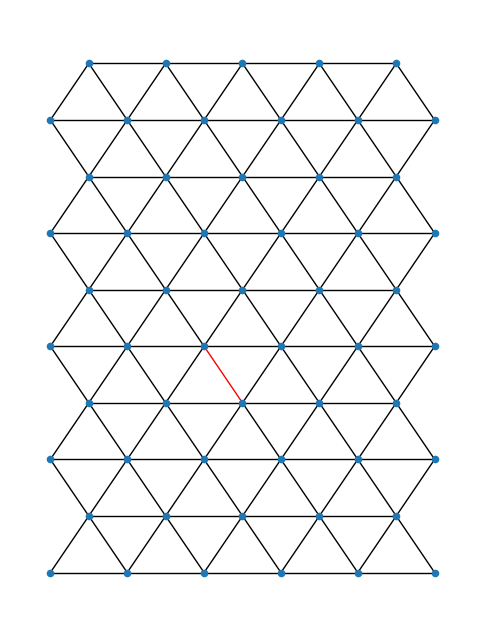

In [ ]:
L = 9
LL = 9
G = nx.triangular_lattice_graph(L, LL, periodic=False, with_positions=True, create_using=None)
Gg = nx.convert_node_labels_to_integers(G)
fig, ax = plt.subplots(figsize=(6, 8))
pos = nx.get_node_attributes(Gg, 'pos')
neg_weightsGg = {(19, 24): -1}
nx.set_edge_attributes(Gg, values=1, name='weight')
nx.set_edge_attributes(Gg, values=neg_weightsGg, name='weight')
Ggedges = list(Gg.edges(data=True))
edge_colorGg = ['red' if d['weight'] == -1 else 'black' for u,v,d in Ggedges]
nx.draw(Gg, pos=pos, ax=ax,  with_labels=False, node_size=20, edge_color=edge_colorGg)

In [ ]:
column_indices = [node_id for node_id, pos in nx.get_node_attributes(Gg, 'pos').items() if pos[0] == 2]
column_indices

[2, 13, 24, 35, 46]

[4, 15, 26, 37, 48]


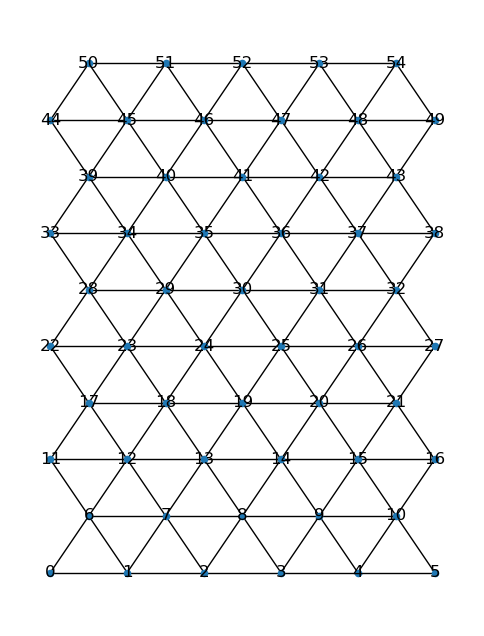

In [ ]:
# Assuming you have created a triangular grid using networkx
n = 3  # Number of rows in the grid
m = 4  # Number of columns in the grid
G = nx.triangular_lattice_graph(n, m)

# Define the column index you want to extract
column_index = L // 2  # Half of the horizontal length

# Extract the indices of nodes belonging to the same column
column_indices = [node_id for node_id, pos in nx.get_node_attributes(Gg, 'pos').items() if pos[0] == column_index]

print(column_indices)
pos = nx.get_node_attributes(Gg, 'pos')
fig, ax = plt.subplots(figsize=(6, 8))

nx.draw(Gg, pos=pos, ax=ax,  with_labels=True, node_size=20)

In [ ]:
column_index

2

In [ ]:
nx.get_node_attributes(Gg, 'pos').items()

dict_items([(0, (0.0, 0.0)), (1, (1.0, 0.0)), (2, (2.0, 0.0)), (3, (3.0, 0.0)), (4, (4.0, 0.0)), (5, (5.0, 0.0)), (6, (0.5, 0.8660254037844386)), (7, (1.5, 0.8660254037844386)), (8, (2.5, 0.8660254037844386)), (9, (3.5, 0.8660254037844386)), (10, (4.5, 0.8660254037844386)), (11, (0.0, 1.7320508075688772)), (12, (1.0, 1.7320508075688772)), (13, (2.0, 1.7320508075688772)), (14, (3.0, 1.7320508075688772)), (15, (4.0, 1.7320508075688772)), (16, (5.0, 1.7320508075688772)), (17, (0.5, 2.598076211353316)), (18, (1.5, 2.598076211353316)), (19, (2.5, 2.598076211353316)), (20, (3.5, 2.598076211353316)), (21, (4.5, 2.598076211353316)), (22, (0.0, 3.4641016151377544)), (23, (1.0, 3.4641016151377544)), (24, (2.0, 3.4641016151377544)), (25, (3.0, 3.4641016151377544)), (26, (4.0, 3.4641016151377544)), (27, (5.0, 3.4641016151377544)), (28, (0.5, 4.330127018922193)), (29, (1.5, 4.330127018922193)), (30, (2.5, 4.330127018922193)), (31, (3.5, 4.330127018922193)), (32, (4.5, 4.330127018922193)), (33, (0.0